In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
logs = pd.read_csv ('C://Users/psy_f/Desktop/3_logs.csv', sep = ',', encoding = 'windows-1251')
user_data = pd.read_csv ('C://Users/psy_f/Desktop/3_user_data.csv', sep = ',', encoding = 'windows-1251')

In [3]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [4]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [5]:
logs.head(5)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
user_data.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


### Объединим датафреймы в одну таблицу по id клиента

In [7]:
all_data = logs.merge(user_data, on = 'client')

In [8]:
all_data.head(5)

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


### Определим топ 10 клиентов по успешным сделкам и количество успешных сделок по платформам

In [9]:
best_client = all_data \
    .query ('success == True') \
    .value_counts('client')
best_client.head(10)

client
12179    41
36165    41
28719    41
61473    41
61468    41
92584    41
82563    41
52870    41
78349    41
64064    40
dtype: int64

In [10]:
platform_success = all_data \
    .query ('success == True') \
    .value_counts ('platform')
platform_success

platform
phone       1565
computer     843
tablet       139
dtype: int64

### Какой процент от всех сделок совершают премиум-клиенты и какую платформу предпочитают

In [11]:
premium_operations_percentage = all_data.query('premium == True').value_counts('premium')/all_data.shape[0]

In [12]:
premium_operations_percentage

premium
True    0.122129
dtype: float64

In [13]:
premium_platform = all_data \
    .query ('premium == True') \
    .value_counts('platform')

In [14]:
premium_platform

platform
phone       246
computer    150
tablet       24
dtype: int64

### Визуализируем распределение по количеству сделок премиумных и обычных пользователей по их возрасту

In [15]:
premium_clients = all_data.query('premium == True')
non_premium_clients = all_data.query('premium == False')

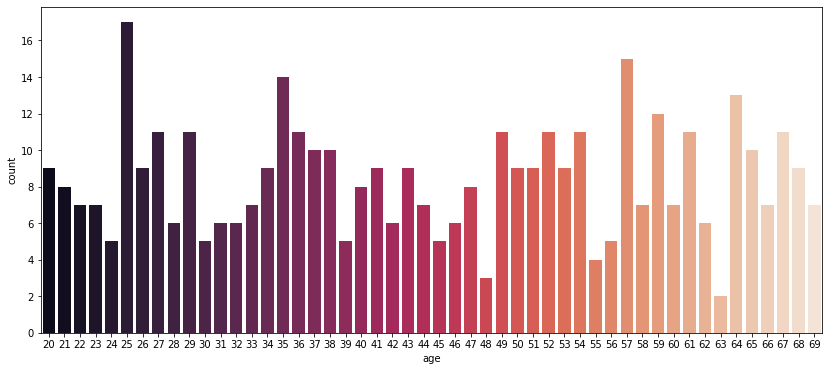

In [16]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x = 'age', data = premium_clients, palette = 'rocket')

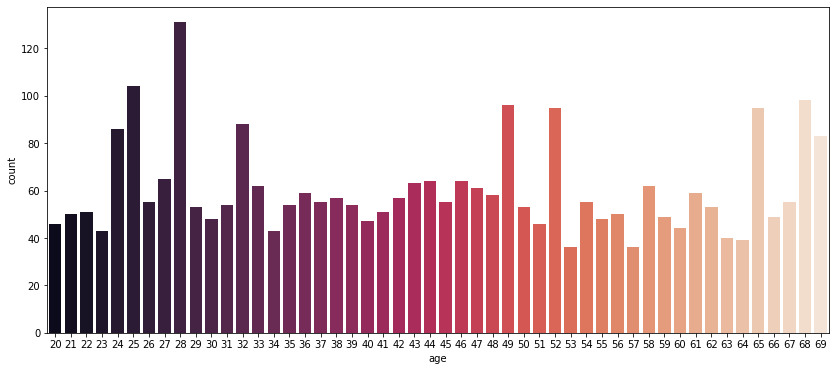

In [17]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x = 'age', data = non_premium_clients, palette = 'rocket')